In [6]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif,mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,  cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows',20000)
pd.set_option('display.max_columns',20000)


In [7]:
df = pd.read_csv("phase_data_sample.csv")

In [17]:
df.shape

(17337, 135)

In [14]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
20       float64
21       float64
22       float64
23       float64
24       float64
25       float64
26       float64
27       float64
28       float64
29       float64
30       float64
31       float64
32       float64
33       float64
34       float64
35       float64
36       float64
37       float64
38       float64
39       float64
40       float64
41       float64
42       float64
43       float64
44       float64
45       float64
46       float64
47       float64
48       float64
49       float64
50       float64
51       float64
52       float64
53       float64
54       float64
55       float64
56       float64
57       float64
58       float

In [6]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,0.510428,0.602834,-2.611784,-0.655756,1.971535,-0.699091,0.275910,-0.123512,-1.649618,0.226110,-1.663660,-0.854073,-0.254454,0.390958,-0.006717,-1.384508,-1.564886,-1.469919,-0.758258,-0.264166,0.555455,0.429307,-0.683309,0.864091,0.335840,0.273424,0.912177,1.417625,-1.503210,-3.229948,0.309263,-0.958911,-0.561021,-0.186811,-1.674358,0.087865,-0.156046,-1.718038,0.075944,-0.949454,-0.546214,-0.158087,-0.415936,-0.552641,-0.384329,-0.428871,-0.346411,-0.399375,-0.392835,-0.341224,0.939621,-1.848086,0.835272,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.444880,-2.560023,-0.756626,-0.172030,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.704380,0.558248,-1.034240,1.260648,0.854761,0.738142,1.862321,1.591342,-1.482270,-3.028270,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832,0
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,2.227854,0.488801,0.869589,0.524477,-0.072759,-0.372948,0.410288,1.633895,-0.080093,-0.662573,0.126520,-0.068859,-1.015324,0.470486,-1.665262,-1.051583,-0.419912,-1.908337,-2.694637,0.203448,0.797356,0.672867,-0.556727,-0.223796,-1.032485,-0.558210,-0.183893,-1.217633,0.999451,0.312074,-1.045948,-0.451498,0.228375,0.773793,1.185013,-0.111135,-2.458225,0.635025,-0.756338,-0.045011,-0.546214,-0.158087,-0.073106,-0.552641,-0.384329,-0.182729,-0.346411,-0.005420,0.010922,-0.341224,0.108530,0.575377,0.086622,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.444880,-2.560023,-0.756626,-0.172030,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.704380,0.558248,-1.034240,1.260648,0.854761,0.738142,1.862321,1.591342,-1.482270,-3.028270,0.340762,-0.660121,-0.943919,-0.746944,-1.166236,0.830219,-0.587426,-2.716165,0.224809,-1.226167,-0.46066,-0.199405,-0.294773,-0.540792,-0.10098,-0.07655,-0.123149,-0.194507,-0.309327,4.153249,-0.177772,-0.158242,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832,1
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,-0.131271,-0.143971,0.214676,0.261350,-0.221840,0.210723,0.368094,0.339829,0.201755,0.140167,-0.252236,0.211500,-0.322554,-0.225943,-0.069276,0.732342,0.244520,0.384309,0.131573,0.069193,-1.182271,0.285562,0.255605,0.461599,-0.110563,0.160692,-0.257467,-0.275564,0.005752,-0.057336,-0.387577,0.153561,-0.095784,-0.152400,0.107925,-0.200695,-0.448275,-0.271764,-0.363180,-0.262740,1.492851,-0.158087,-0.073106,-0.552641,0.558302,0.008714,-0.346411,-0.399375,-0.392835,-0.341224,0.364250,0.548745,-0.028555,-2.699907,1.664515,-0.978482,2.466605,-0.301193,-0.337791,-0.073385,1.711205,0.05499,-0.003045,0.560834,1.099961,-3.784082,-1.526571,2.173336,-0.812729,0.159144,0.218429,-3.271733,0.444880,-2.560023,-0.756626,-0.172030,-0.099119,-0.448836,-2.229112,-0.925046,-1.935574,-1.671336,0.077495,1.704380,0.558248,-1.034240,1.260648,0.854761,0.738142,1.862321,1.591342,-1.482270,-3.028270,

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,label
count,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,1.733700e+04,17337.000000,1.733700e+04,17337.000000
mean,-1.311494e-17,6.557469e-18,1.639367e-17,1.803304e-17,-4.344323e-17,-3.114798e-17,-1.639367e-18,4.918102e-17,-1.229525e-17,1.352478e-17,4.067680e-17,-1.639367e-18,-2.049209e-19,1.803304e-17,-2.172162e-17,-1.557399e-17,-2.459051e-18,2.622988e-17,-1.690597e-17,2.172162e-17,8.196836e-18,-2.003102e-17,-1.844288e-18,1.311494e-17,8.606678e-18,1.643466e-16,-2.858647e-17,-2.418067e-17,8.196836e-19,1.229525e-17,1.045097e-16,2.377082e-17,-2.079947e-17,-1.659859e-17,-3.483655e-18,2.356590e-18,1.127065e-17,4.528752e-17,2.541019e-17,-2.459051e-17,4.016450e-17,-2.008225e-17,1.065589e-17,-3.811529e-17,2.131177e-17,-4.467276e-17,-6.045167e-18,1.147557e-17,-2.377082e-17,-7.172232e-18,3.278734e-17,-4.877117e-17,1.024605e-16,-8.196836e-18,-4.098418e-18,3.524640e-17,-6.659929e-18,2.377082e-17,1.926256e-17,9.426361e-18,1.225427e-16,-2.700857e-16,-9.569806e-17,-1.475430e-17,5.286959e-17,5.245975e-17,-7.582073e-18,2.049209e-17,-5.164007e-17,5.409912e-17,-4.938594e-17,5.327943e-17,-6.803374e-17,-1.598383e-17,-5.286959e-17,3.073814e-17,1.475430e-17,1.639367e-17,4.590228e-17,-1.065589e-17,1.639367e-17,-9.057504e-17,6.557469e-17,1.885272e-17,2.622988e-17,-6.434516e-17,-1.393462e-16,-1.270510e-17,-1.557399e-17,1.803304e-17,-3.442671e-17,-2.582003e-17,3.114798e-17,-4.397603e-16,-1.762320e-17,7.377152e-18,-1.008211e-16,-4.098418e-17,-3.852513e-17,4.590228e-17,6.393532e-17,7.049279e-17,-5.819754e-17,5.655817e-17,4.590228e-17,1.639367e-17,-3.422179e-17,-7.336168e-17,4.098418e-17,5.082038e-17,1.393462e-17,4.836133e-17,9.016520e-18,-8.893567e-17,3.278734e-18,1.155754e-16,-6.065659e-17,3.832021e-17,6.967311e-18,2.254130e-17,1.721336e-17,6.434516e-17,-2.459051e-17,1.844288e-17,2.090193e-17,4.815641e-17,7.377152e-18,1.844288e-17,2.090193e-17,-4.098418e-19,-2.541019e-17,2.663972e-18,0.000000,-6.106643e-17,5.9

In [7]:
df['label'].value_counts()


5     3704
9     3138
1     2604
0     1821
8     1678
14    1487
7     1283
2      615
10     418
3      145
15     128
6      100
13      92
11      91
4       22
16       9
12       2
Name: label, dtype: int64

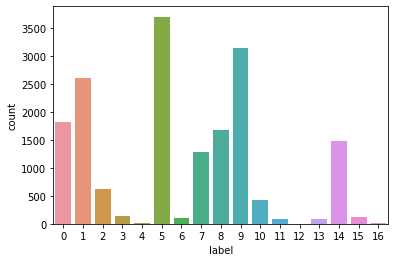

In [12]:
sns.countplot(df['label'])
#sns.distplot( df['label'])

In [10]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [25]:

for col in df.columns:
    lb=LabelEncoder()
    lb.fit(df[col])
    df[col]=lb.transform(df[col])
    
x_train=df.drop(['label',],axis=1)
y_train=df['label']

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=100)

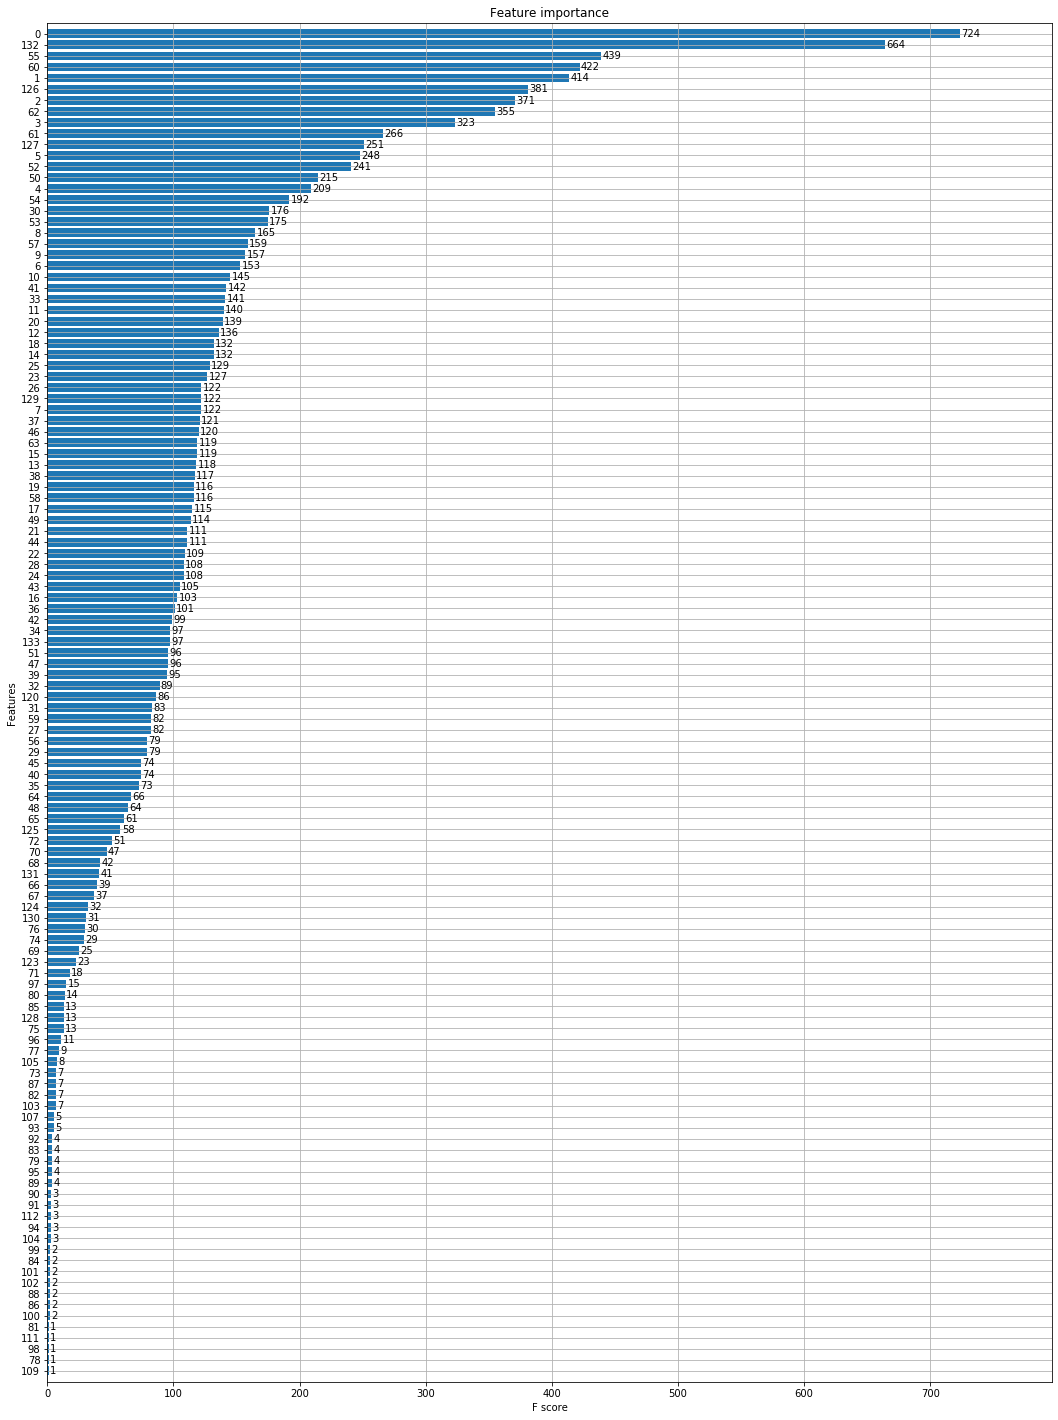

In [6]:
fig, ax = plt.subplots(figsize=(18,25))
xgb.plot_importance(model, height=0.8, ax=ax, max_num_features=140)
plt.show()

In [ ]:
var_name = "0"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=label, y='var_name', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [10]:
df['0'].value_counts()

1224    2500
867      775
879      674
2426     553
2014     529
1435     465
748      419
1912     303
710      299
1357     282
1563     275
2161     230
1472     219
580      207
328      179
957      175
1065     174
910      168
61       153
781      144
2356     141
2189     139
101      138
768      128
1722     125
2387     120
515      113
1350     111
707       94
1460      92
2044      89
2064      84
605       76
2116      75
2254      69
1343      67
507       67
974       61
490       61
859       58
2240      56
2247      54
1766      53
1354      52
2300      48
2352      47
1828      44
430       44
2527      42
296       38
1910      38
52        37
184       36
1777      34
380       33
89        31
2200      31
994       30
1527      30
1279      29
239       28
217       28
694       26
939       26
305       26
2231      26
1800      24
1819      24
701       23
99        23
2255      23
1640      22
2225      20
639       20
2493      20
1530      19
699       19

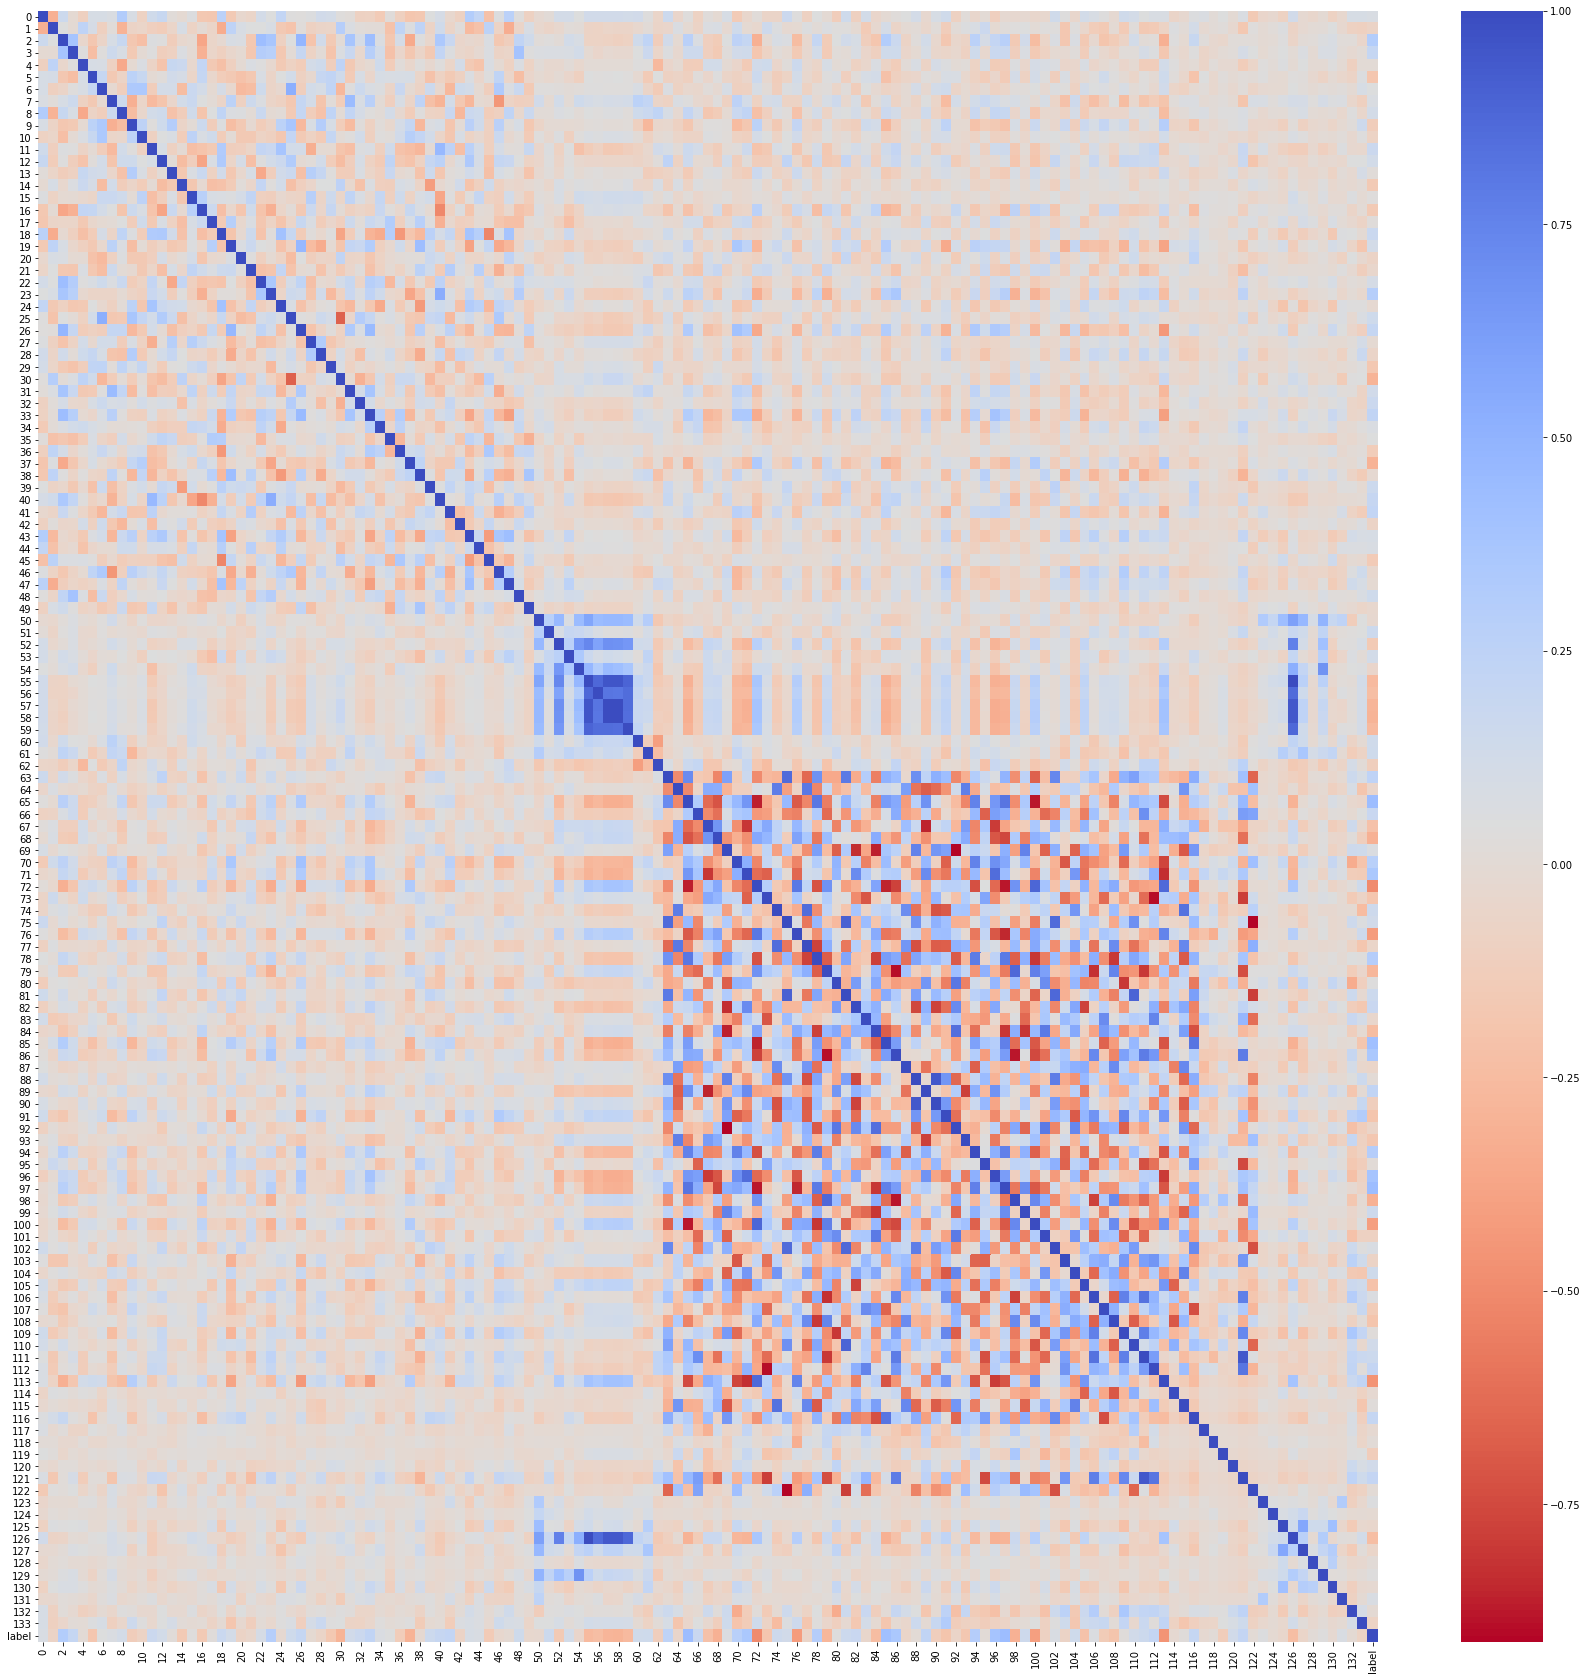

In [16]:
#sns.heatmap(df.corr(),yticklabels=False,cbar=False,cmap="YlGnBu")
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':100},ax=ax)



In [8]:
x=df.drop(['label',],axis=1)
y=df['label']

In [67]:
best_features = SelectKBest(score_func = f_regression, k=130 )
fit = best_features.fit(x,y)

In [68]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [69]:
featurescore = pd.concat([dfscore,dfcolumns],axis=1)

In [70]:
featurescore.columns = ['scores','specs']

In [71]:
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
72,4774.780401,72
113,4606.012141,113
97,4585.184558,97
76,4307.543692,76
65,4207.987630,65
86,3544.513023,86
85,3524.350369,85
96,3036.933204,96
78,2855.153533,78
100,2812.851047,100


In [36]:
print(featurescore.nlargest(130,'scores'))

           scores specs
26   2.046397e+06    26
38   1.978652e+06    38
19   1.801164e+06    19
2    1.694505e+06     2
33   1.578494e+06    33
43   1.243625e+06    43
37   1.225508e+06    37
41   1.149868e+06    41
7    1.094073e+06     7
9    1.065498e+06     9
24   1.055680e+06    24
61   1.022741e+06    61
8    9.574957e+05     8
60   9.477354e+05    60
40   9.357249e+05    40
28   8.998180e+05    28
47   8.911112e+05    47
31   8.766834e+05    31
34   8.746736e+05    34
0    8.722529e+05     0
25   8.682948e+05    25
30   8.563327e+05    30
23   8.486931e+05    23
46   8.099597e+05    46
18   7.611377e+05    18
22   7.462577e+05    22
16   7.348663e+05    16
11   7.180232e+05    11
42   6.959653e+05    42
62   6.947834e+05    62
17   6.916274e+05    17
21   6.708945e+05    21
5    6.473323e+05     5
3    6.453248e+05     3
13   6.128903e+05    13
49   5.474734e+05    49
45   5.348773e+05    45
29   5.322065e+05    29
27   5.133182e+05    27
15   5.045584e+05    15
39   4.989262e+0

In [38]:
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
print(model.feature_importances_)

[1.27324532e-02 5.05010235e-03 1.27829299e-02 6.69693737e-03
 6.36305211e-03 6.74595319e-03 5.72026530e-03 8.88064011e-03
 6.98899858e-03 1.16660739e-02 5.24795926e-03 9.22930712e-03
 7.89280678e-03 6.91391105e-03 8.60749573e-03 8.72815445e-03
 8.57678873e-03 7.29520179e-03 9.07502524e-03 6.72064502e-03
 9.29400061e-03 6.13966142e-03 1.25122479e-02 7.55458953e-03
 7.16723554e-03 7.00359887e-03 6.94573597e-03 5.55544789e-03
 8.13564741e-03 6.93795425e-03 1.18677724e-02 6.47350571e-03
 7.63575753e-03 1.31365620e-02 1.00681531e-02 4.40249547e-03
 8.20875917e-03 1.27740114e-02 8.47809530e-03 5.00452661e-03
 1.13344300e-02 7.42624583e-03 5.70330597e-03 1.16249691e-02
 5.81279236e-03 8.39307134e-03 8.46331611e-03 7.86542227e-03
 6.39068207e-03 1.08918405e-02 1.56774074e-02 2.86955504e-03
 1.79736727e-02 1.64819350e-02 1.46696973e-02 2.31767904e-02
 8.64863147e-03 1.80277305e-02 2.14688266e-02 9.81932322e-03
 2.23471953e-02 2.65070817e-02 2.00058509e-02 8.41077129e-04
 2.85058791e-04 8.657560

In [43]:
#feat_importance = pd.series(model.feature_importances_, index=x.columns)

dfscore1= pd.DataFrame(model.feature_importances_)
dfcolumns1=pd.DataFrame(x.columns)

In [44]:
featurescore1 = pd.concat([dfscore1,dfcolumns1],axis=1)

In [45]:
featurescore1.columns = ['scores','specs']

In [46]:
featurescore1 = featurescore1.set_index('specs')

In [48]:
print(featurescore1.nlargest(130,'scores'))

         scores
specs          
132    0.038938
61     0.026507
127    0.025139
55     0.023177
60     0.022347
126    0.021930
58     0.021469
62     0.020006
57     0.018028
52     0.017974
125    0.017902
53     0.016482
116    0.015946
50     0.015677
54     0.014670
33     0.013137
98     0.012949
2      0.012783
37     0.012774
0      0.012732
22     0.012512
81     0.012507
30     0.011868
9      0.011666
43     0.011625
72     0.011401
40     0.011334
103    0.011271
120    0.011138
49     0.010892
34     0.010068
85     0.010012
59     0.009819
133    0.009318
20     0.009294
11     0.009229
18     0.009075
129    0.008926
7      0.008881
15     0.008728
65     0.008658
86     0.008653
56     0.008649
14     0.008607
16     0.008577
38     0.008478
46     0.008463
45     0.008393
113    0.008252
91     0.008214
36     0.008209
28     0.008136
12     0.007893
47     0.007865
32     0.007636
23     0.007555
41     0.007426
17     0.007295
89     0.007257
24     0.007167
131    0

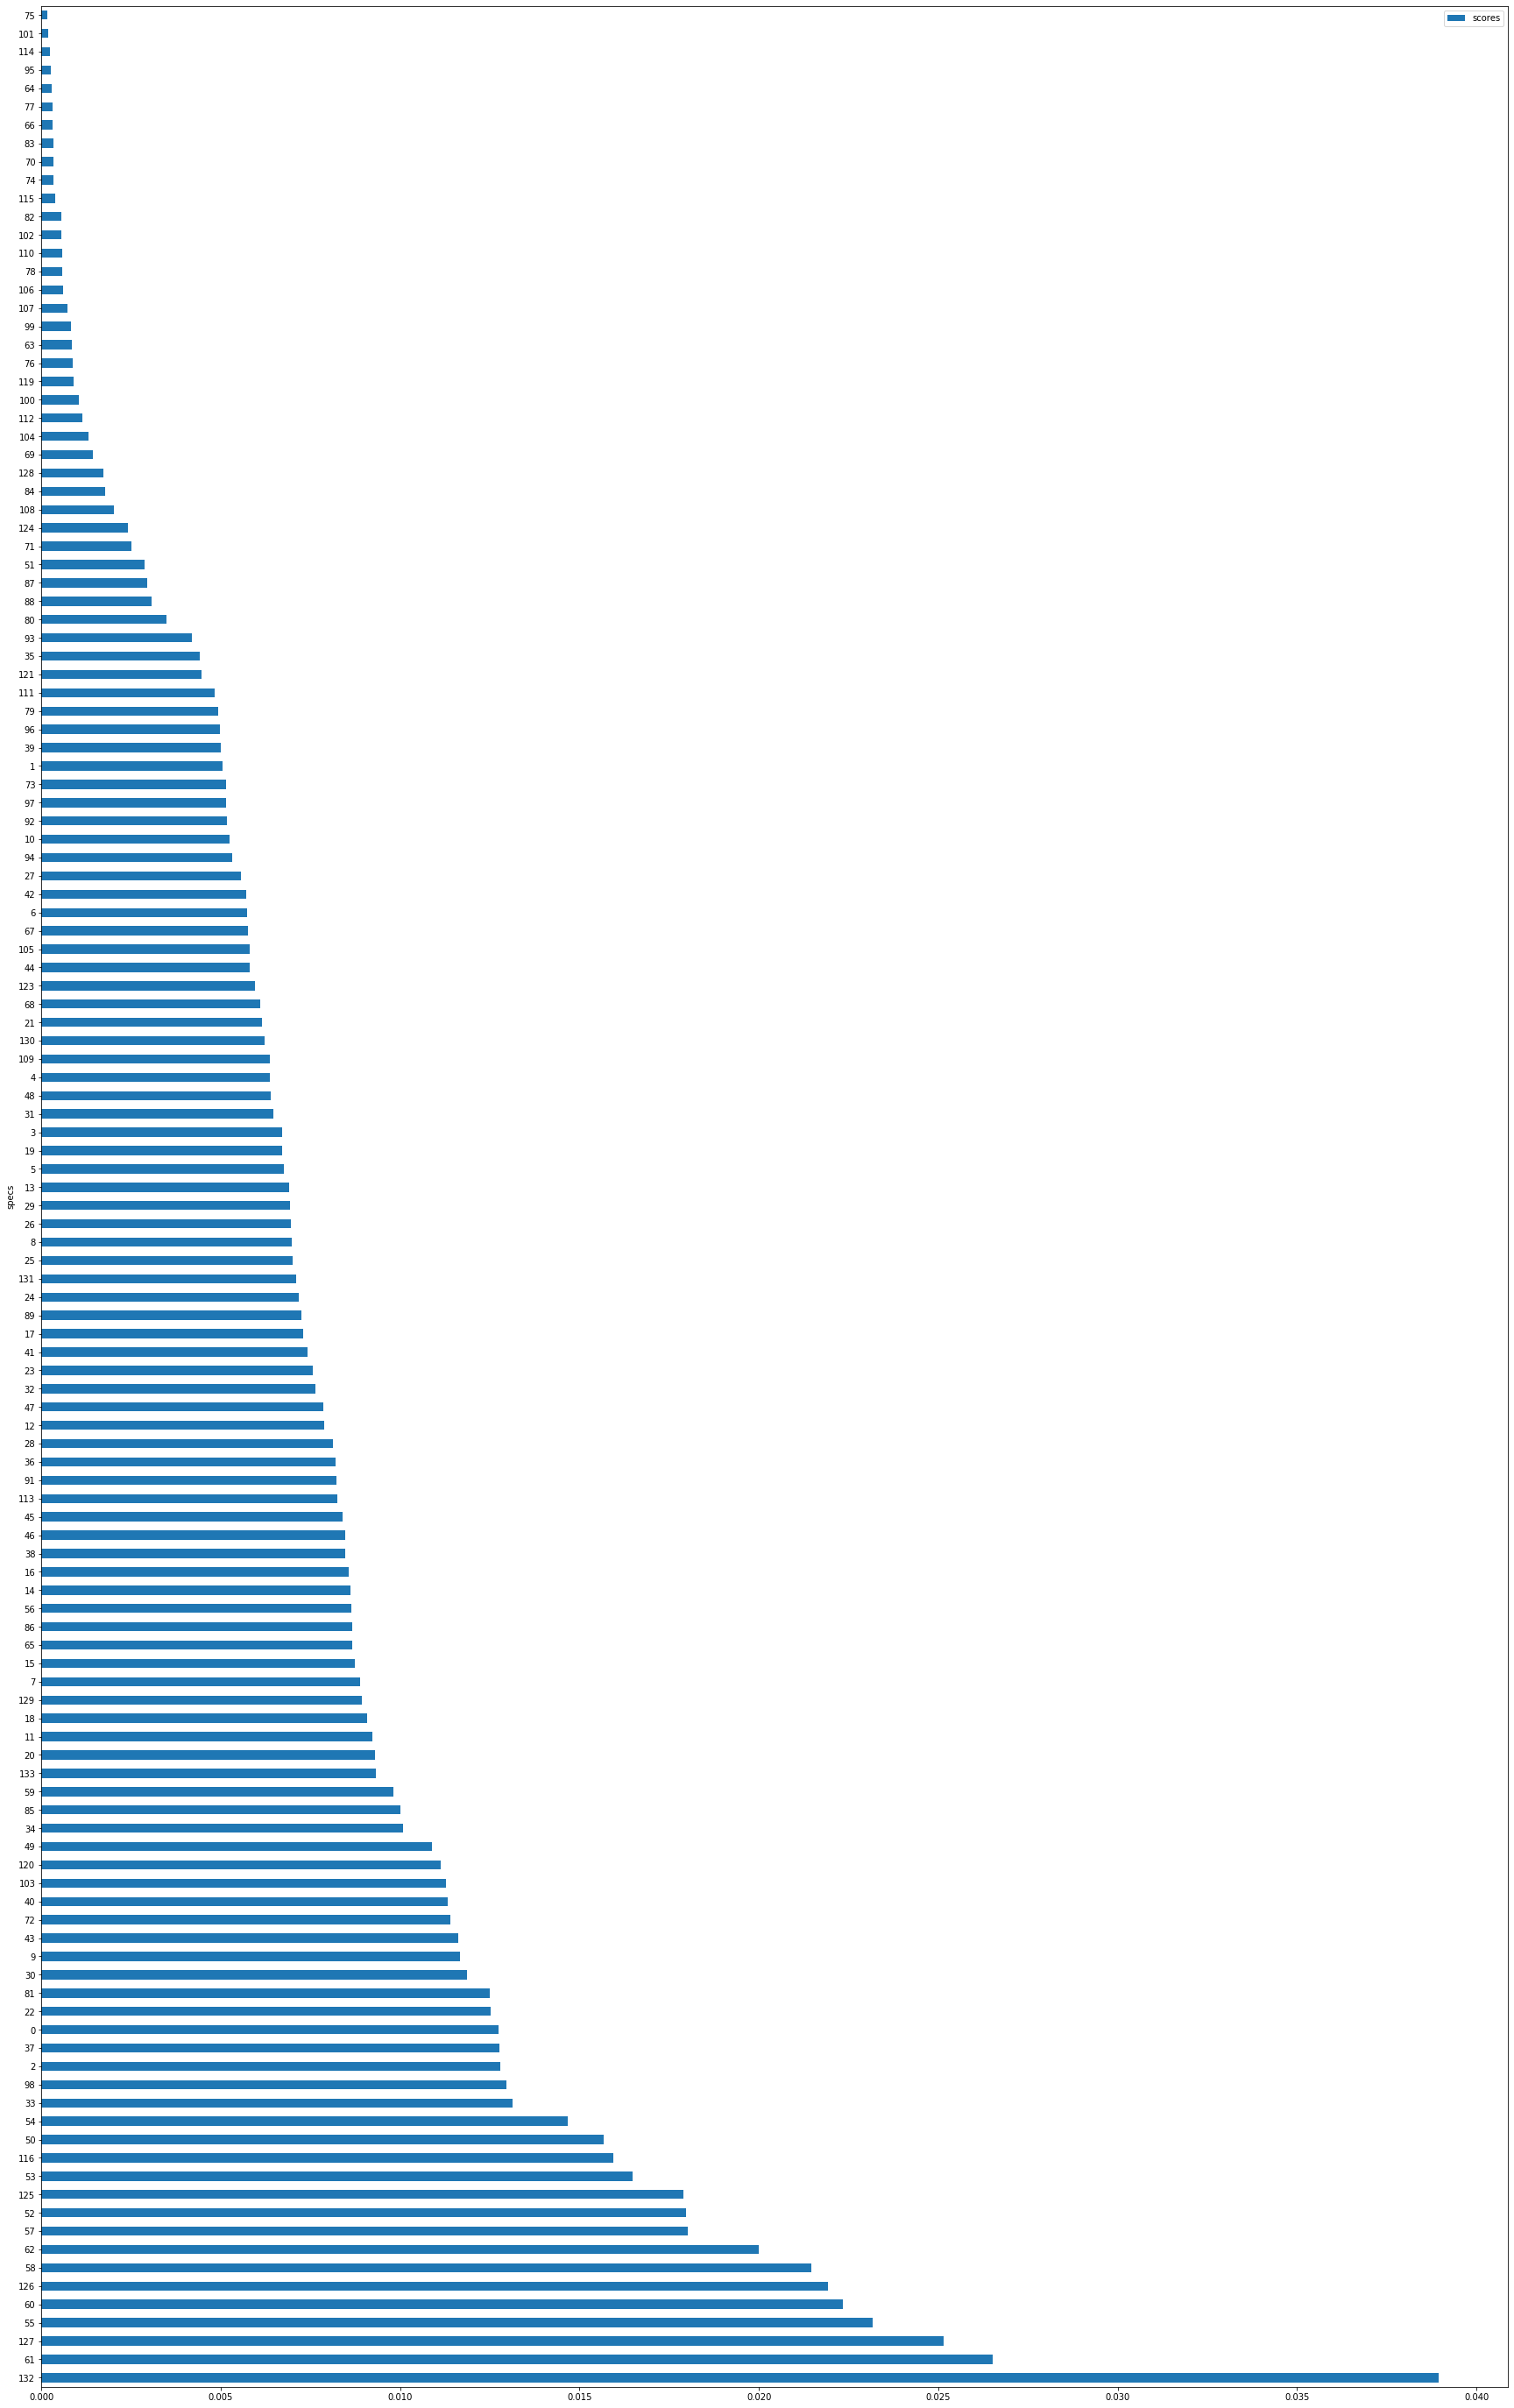

In [59]:

featurescore1.nlargest(130,'scores').plot(kind='barh', figsize=(30,50))
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=22,test_size=0.2)

In [84]:
LogisiticRegression = LogisticRegression(multi_class='ovr')

In [85]:
LogisiticRegression.fit(x_train, y_train)
#training_score = cross_val_score(LogisiticRegression, x_train, y_train, cv=5)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
training_score

array([0.78373516, 0.78661389, 0.76720721, 0.78981582, 0.78062884])

In [86]:
y_pred = LogisiticRegression.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred)
#confusion_matrix(y_test,y_pred)

0.7773933102652826

In [22]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Lib

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
log_reg = grid_log_reg.best_estimator_
log_reg

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
LogisiticRegression = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
LogisiticRegression.fit(x_train, y_train)
y_pred = LogisiticRegression.predict(x_test)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [83]:
accuracy_score(y_test,y_pred)
#confusion_matrix(y_test,y_pred)

0.7837370242214533

In [31]:
#from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [40]:
clf = OneVsRestClassifier(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)).fit(x_train, y_train)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [96]:
y_pred = clf.predict(x_test)


In [97]:
accuracy_score(y_test,y_pred)

0.7837370242214533

In [59]:
accuracy_score(y_test,y_pred)
#precision_score(y_test,y_pred)
#recall_score(y_test,y_pred)
#f1_score(y_test,y_pred)
#roc_auc_score(y_test,y_pred)
#confusion_matrix(y_test,y_pred)

0.7773933102652826

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
print('Logistic Regression: ', roc_auc_score(y_train, y_pred))

ValueError: multiclass format is not supported

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

In [ ]:
def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top Logistic classifier', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    #plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    #plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    #plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

In [ ]:
def plot_learning_curve(estimator1,X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [73]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
#predictions = classifier.predict(x_test)

AttributeError: 'Series' object has no attribute 'reshape'

In [74]:
from skmultilearn.adapt import MLkNN

In [82]:
classifier = MLkNN(k=20)

# train
classifier.fit(x_train, y_train)

# predict
#predictions = classifier.predict(x_test)

#accuracy_score(y_test,predictions)

AttributeError: 'Series' object has no attribute 'getformat'

In [138]:
Suvm = SVC()
Suvm.fit(x_train,y_train)
y_pred = Suvm.predict(x_test)
accuracy_score(y_test,y_pred)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [140]:
accuracy_score(y_test,y_pred)

0.8047866205305652

In [141]:
clf = OneVsRestClassifier(Suvm)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8143021914648212

In [142]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.7664359861591695

In [143]:
#knn.fit(x_train,y_train)
#y_pred = knn.predict(x_test)
#accuracy_score(y_test,y_pred)

clf = OneVsRestClassifier(knn)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7670126874279123

In [7]:
xgb_model = xgb.XGBClassifier() 

In [145]:
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8212226066897347

In [10]:
params = {"n_estimators" : [int(x) for x in np.linspace(start=100,stop=1200, num=12)],
         "learning_rate" : [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
          "max_depth" : [int(m) for m in np.linspace(start=5,stop=30,num=6)],
          "subsample" : [0.5,0.6,0.7,0.8],
          "min_child_weight" : [3,4,5,6,7,8,9,10]
         }

In [12]:

xgb_model_hyper_tune= RandomizedSearchCV(xgb.XGBClassifier(),  params,  n_jobs=-1,cv=5, )

In [13]:
xgb_model_hyper_tune.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7, 8,
                                                             9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.5, 0.6, 0.7, 0.8]})

In [18]:
xgb_model_hyper_tune.best_params_

{'subsample': 0.5,
 'n_estimators': 500,
 'min_child_weight': 8,
 'max_depth': 25,
 'learning_rate': 0.05}

In [164]:
sc = MinMaxScaler()
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.transform(x_test)

model = MultinomialNB()
model.fit(X_train_std,y_train)
pred=model.predict(X_test_std)
accuracy_score(y_test,pred)


0.5533448673587081

In [167]:
clf = OneVsRestClassifier(model)
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)
accuracy_score(y_test,y_pred)

0.5420991926182238